## Libs

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('../datasets/calculated_features_19356_218115_284326303661025295376814747572002634939.csv')

In [46]:
print(df.shape)
print(list(df.columns))

(35905, 110)
['delta_price', 'next_score', 'average_points_last_1_rounds', 'average_price_last_1_rounds', 'team_points_last_1_rounds', 'team_goals_scored_last_1_rounds', 'team_goals_taken_last_1_rounds', 'enemy_goals_scored_last_1_rounds', 'enemy_goals_taken_last_1_rounds', 'enemy_points_last_1_rounds', 'home_team', 'team_goals_taken_last_1_rounds.1', 'average_plays_last_1_rounds_fc_play', 'average_plays_last_1_rounds_gc_play', 'average_plays_last_1_rounds_ca_play', 'average_plays_last_1_rounds_cv_play', 'average_plays_last_1_rounds_sg_play', 'average_plays_last_1_rounds_dd_play', 'average_plays_last_1_rounds_dp_play', 'average_plays_last_1_rounds_gs_play', 'average_plays_last_1_rounds_fs_play', 'average_plays_last_1_rounds_pe_play', 'average_plays_last_1_rounds_a_play', 'average_plays_last_1_rounds_ft_play', 'average_plays_last_1_rounds_fd_play', 'average_plays_last_1_rounds_ff_play', 'average_plays_last_1_rounds_g_play', 'average_plays_last_1_rounds_i_play', 'average_plays_last_1_rou

In [30]:
df = df.loc[df.next_score != 0.0] ## Dropping players that didnt play

In [32]:
position_list = ['Goleiro', 'Lateral', 'Zagueiro', 'Meia', 'Atacante', 'Técnico']
sizes = list()
for value in sorted(df.position_id.unique()):
    sizes.append(df.loc[df.position_id == value].next_score.mean())
    print('Avg for position %s is %s' %(position_list[value - 1], df.loc[df.position_id == value].next_score.mean()))

Avg for position Goleiro is 3.48823529412
Avg for position Lateral is 3.31997038682
Avg for position Zagueiro is 2.85601289833
Avg for position Meia is 2.3977508792
Avg for position Atacante is 2.79709746028
Avg for position Técnico is 3.41126859504


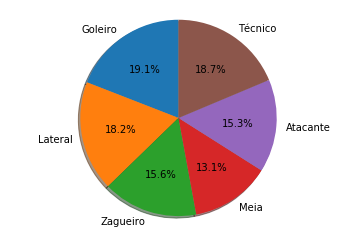

In [33]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=position_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [34]:
df = df.loc[df.position_id != 6] ## Dropping coaches and goalkeepers
df = df.loc[df.position_id != 1]
print(df.shape)

(35905, 115)


In [43]:
auxiliary = ['scout_id', 'match_week', 'player_id', 'team_id', 'position_id']
df.drop(auxiliary, axis=1, inplace = True)


In [42]:
print(df.average_price_last_5_rounds)

1         9.334
9         7.580
14        0.954
15       13.162
17        2.024
18       18.920
24       10.512
28        1.076
33        1.986
34       12.700
35       12.968
36        2.156
39        2.356
41       10.348
50        1.078
52        3.216
53       13.272
54       12.520
55        2.222
56       18.862
60        9.978
66        1.338
70        1.104
71        3.538
72       13.690
73       12.876
74        2.350
75        8.706
76          NaN
79        9.914
          ...  
89879     5.640
89881     3.248
89884    22.808
89891    11.982
89895     4.840
89896     8.394
89910     4.906
89915     9.906
89918     2.864
89926     6.400
89928     7.444
89929     1.044
89931     4.096
89937     7.464
89951    14.664
89959     3.162
89960     8.758
89962     4.242
89967     8.210
89974     9.594
89981    14.664
89984     4.568
89986     7.592
89987    11.086
89988     4.358
89991     9.370
89993     1.000
89995     5.622
89996     8.928
89997     2.152
Name: average_price_last

In [7]:
y = df.next_score
print(y.shape)
x = df.drop(['next_score'], axis=1)

(90002,)


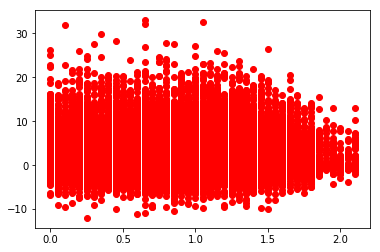

In [48]:
plt.plot(x.enemy_goals_taken_last_20_rounds, y, 'ro')
plt.show()

(array([ 0.45689372,  0.44888585,  0.50822197,  0.61377021,  0.77815407,
         1.00559995,  0.56828103,  0.25591832,  0.0993755 ,  0.02680414]),
 array([ 0.  ,  0.21,  0.42,  0.63,  0.84,  1.05,  1.26,  1.47,  1.68,
         1.89,  2.1 ]),
 <a list of 10 Patch objects>)

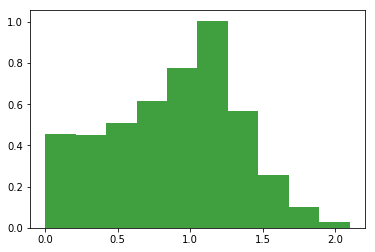

In [52]:
plt.hist(x.enemy_goals_taken_last_20_rounds.dropna(),  normed=1, facecolor='green', alpha=0.75)